In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from Tasks import draw
from Helpers import get_model_data

(712, 2)


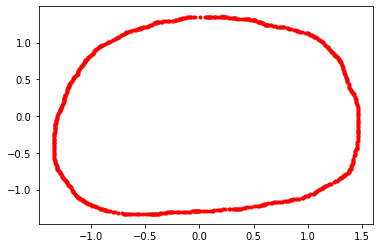

In [9]:
# Load and display one file

fn = 'oval_norm'
file_path = f"/home/spate/PaintApp/{fn}.csv"
test = np.loadtxt(file_path, delimiter=',')
print(test.shape)
plt.plot(test[:,0], test[:,1], 'r.')
plt.show()

In [14]:
# Load all files

save_dir = '/home/spate/PaintApp/'
files = {}

for file in os.listdir(save_dir):
    if '.csv' in file:
        tmp = np.loadtxt(save_dir + file, delimiter=',')
        files[file[:-4]] = tmp
        print(file, tmp.shape)

test.csv (86, 2)
a.csv (127, 2)
b.csv (149, 2)
lol.csv (308, 2)
hello.csv (475, 2)
jasmin_1.csv (671, 2)
jasmin_2.csv (530, 2)
jasmin_3.csv (555, 2)
yusi_1.csv (443, 2)
js.csv (455, 2)
squiggle.csv (87, 2)
double_squiggle.csv (186, 2)
test_norm.csv (86, 2)
a_norm.csv (127, 2)
b_norm.csv (149, 2)
lol_norm.csv (308, 2)
hello_norm.csv (475, 2)
jasmin_1_norm.csv (671, 2)
jasmin_2_norm.csv (530, 2)
jasmin_3_norm.csv (555, 2)
yusi_1_norm.csv (443, 2)
js_norm.csv (455, 2)
squiggle_norm.csv (87, 2)
double_squiggle_norm.csv (186, 2)
jas.csv (210, 2)
min.csv (218, 2)
jas_norm.csv (210, 2)
min_norm.csv (218, 2)
oval.csv (712, 2)
oval_norm.csv (712, 2)


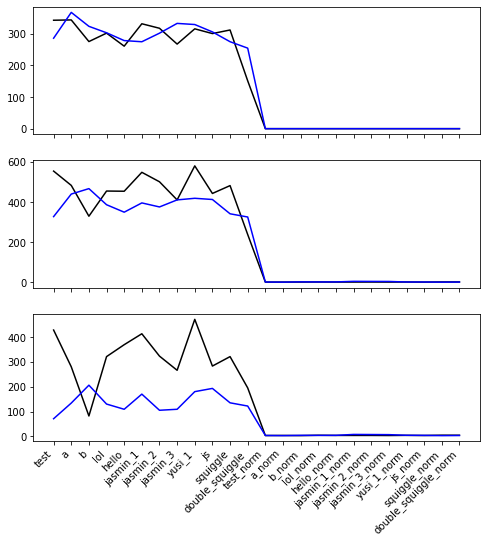

In [39]:
# Plot mean, abs max, range of file values, norm files

xrange, yrange = [], []
xmean, ymean = [], []
xmax, ymax = [], []
for k,v in files.items():
    xrange.append(v[:,0].ptp())
    yrange.append(v[:,1].ptp())
    xmean.append(v[:,0].mean())
    ymean.append(v[:,1].mean())
    xmax.append(abs(v[:,0]).max())
    ymax.append(abs(v[:,1]).max())

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(8,8))
ax[0].plot(xmean, 'k')
ax[0].plot(ymean, 'b')
ax[1].plot(xmax, 'k')
ax[1].plot(ymax, 'b')
ax[2].plot(xrange, 'k')
ax[2].plot(yrange, 'b')
ax[2].set_xticks(np.arange(len(list(files.keys()))))
ax[2].set_xticklabels(list(files.keys()), rotation=45, ha='right')
plt.show()

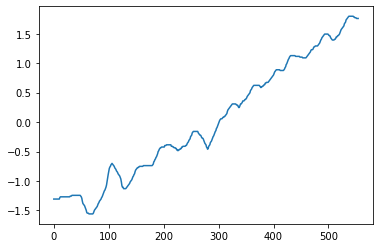

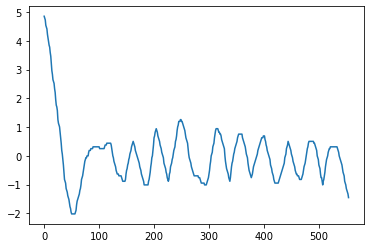

(555, 1) (555, 1)
(555,)


In [21]:
# Plot x & y dimensions separately

fn = 'jasmin_3_norm'

plt.plot(files[fn][:,0])
plt.show()
plt.plot(files[fn][:,1])
plt.show()

In [ ]:
# Save x and y dimensions separately

x = files[fn][:,0].reshape(-1,1)
y = files[fn][:,1].reshape(-1,1)

print(x.shape, y.shape)

np.savetxt(save_dir + 'j3_norm_x.csv', x, delimiter=',')
np.savetxt(save_dir + 'j3_norm_y.csv', y, delimiter=',')

foo_x = np.loadtxt(save_dir + 'j3_norm_x.csv', delimiter=',')
print(foo_x.shape)

In [7]:
# Normalize drawing data

save_dir = '/home/spate/PaintApp/'
files = {}

for file in os.listdir(save_dir):
    if ('.csv' in file) and ('_norm' not in file):
        tmp = np.loadtxt(save_dir + file, delimiter=',')
        tmp_means = tmp.mean(axis=0).reshape(1, 2)
        tmp_sds = tmp.std(axis=0).reshape(1, 2)
        tmp_norm = (tmp - tmp_means) / tmp_sds # Normalize
        np.savetxt(save_dir + file[:-4] + '_norm.csv', tmp_norm, delimiter=',')

dict_keys(['bias', 'out_bias', 'w', 'w_out', 'loss', 'output', 'syncur', 'stim', 'target'])
(60, 712)


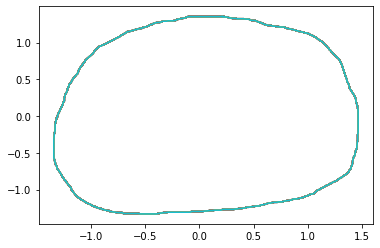

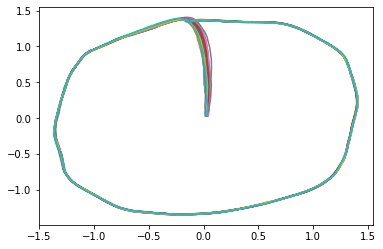

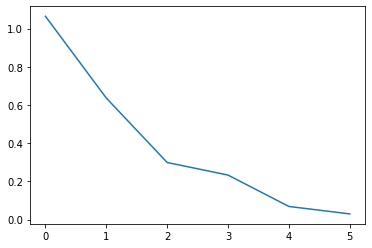

In [11]:
# Look at RNN performance / drawing match

data = get_model_data('/cnl/data/spate/Rnn/ModelData/Draw/Run_19')
n_outputs = 2
test_eps = 30
print(data.keys())
print(data['output'].shape)
data['target'], data['output'] = data['target'].reshape(test_eps, n_outputs, -1), data['output'].reshape(test_eps, n_outputs, -1)

plt.plot(data['target'][:,0,:].T, data['target'][:,1,:].T )
plt.show()
plt.plot(data['output'][:,0,2:].T, data['output'][:,1,2:].T)
plt.show()

plt.plot(data['loss'])
plt.ylabel("Mean square error")
plt.xlabel("Episodes")
plt.show()